In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from pathlib import Path
RES = Path.cwd().parent / "Simulation Results"
IMG = Path.cwd() / "Images"

In [5]:
files = list((RES / "Цепочки_вечер").glob('*.txt'))
files

[WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_вечер/Example_of_Conformation_N_1000_J_0.647000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_вечер/Example_of_Conformation_N_1000_J_0.657000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_вечер/Example_of_Conformation_N_1000_J_0.667000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_вечер/Example_of_Conformation_N_1000_J_0.677000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_вечер/Example_of_Conformation_N_1000_J_0.687000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_вечер/Example_of_Conformation_N_1000_J_0.697000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_вечер/Example_of_Conformation_N_2500_J_0.647000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_вечер/Example_of_Conformation_N_2500_J_

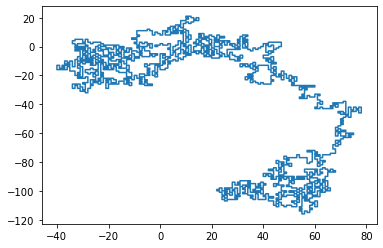

In [28]:
chain10_1 = np.loadtxt(files[0])
chain25_1 = np.loadtxt(files[6])
x = chain25_1[:,0]
y = chain25_1[:,1]
plt.plot(x,y)

In [68]:
files2 = list((RES / "Цепочки_утро").glob('*.txt'))
files2

[WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_утро/Example_of_Conformation_N_1000_J_0.647000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_утро/Example_of_Conformation_N_1000_J_0.657000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_утро/Example_of_Conformation_N_1000_J_0.667000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_утро/Example_of_Conformation_N_1000_J_0.677000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_утро/Example_of_Conformation_N_1000_J_0.687000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_утро/Example_of_Conformation_N_1000_J_0.697000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_утро/Example_of_Conformation_N_2500_J_0.647000.txt'),
 WindowsPath('C:/Users/user/Documents/Проект/Simulation Results/Цепочки_утро/Example_of_Conformation_N_2500_J_0.657000

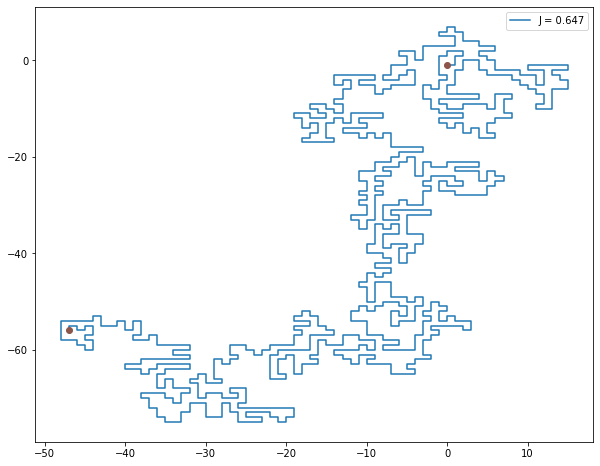

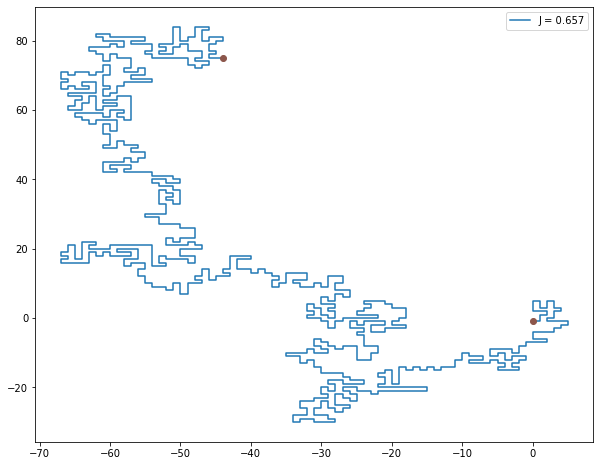

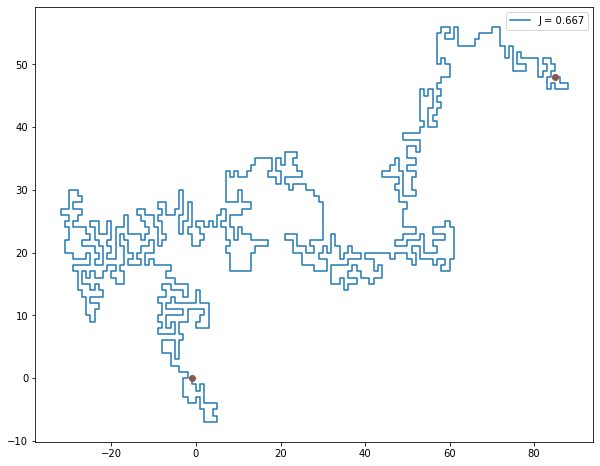

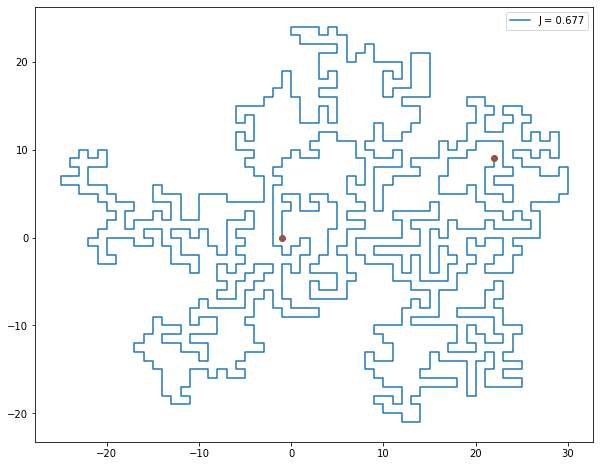

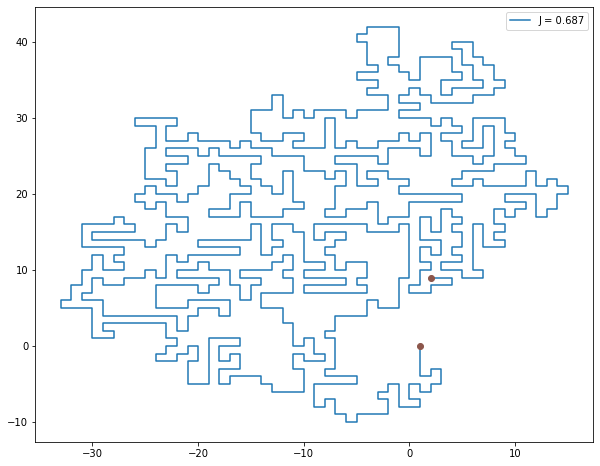

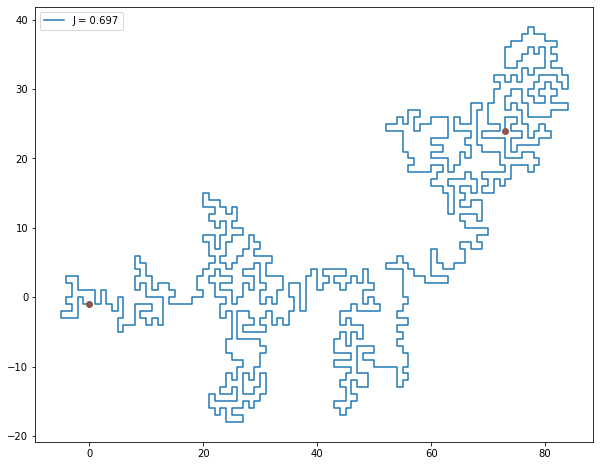

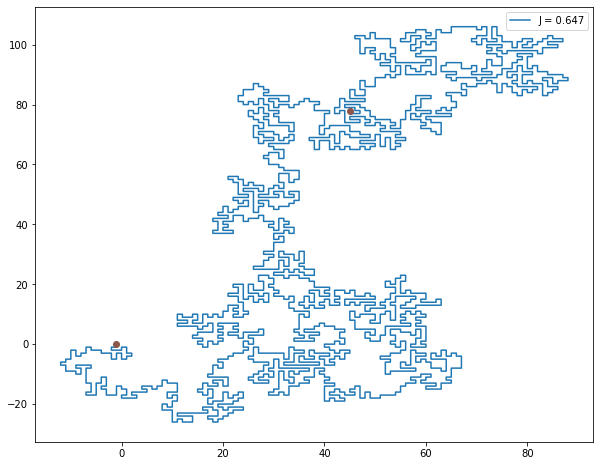

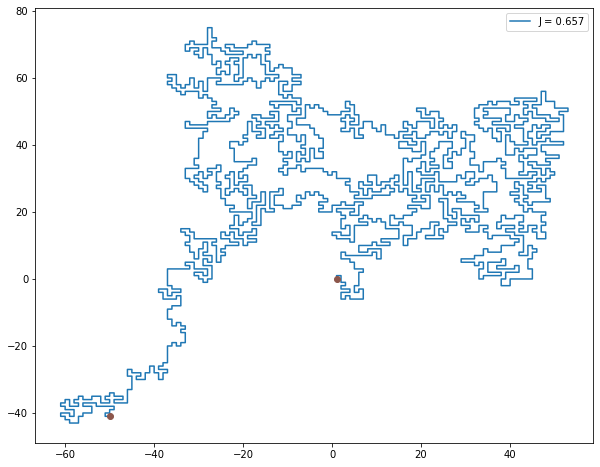

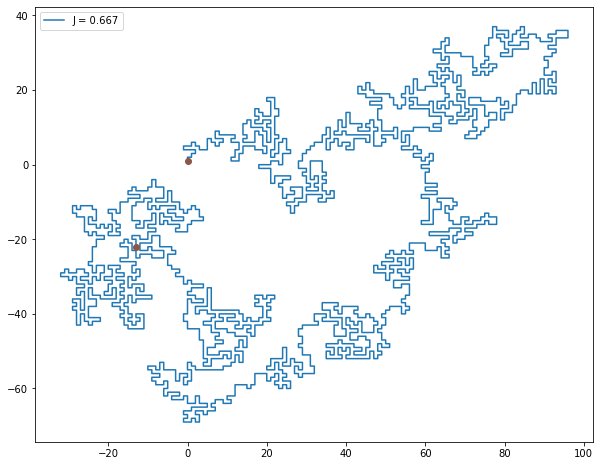

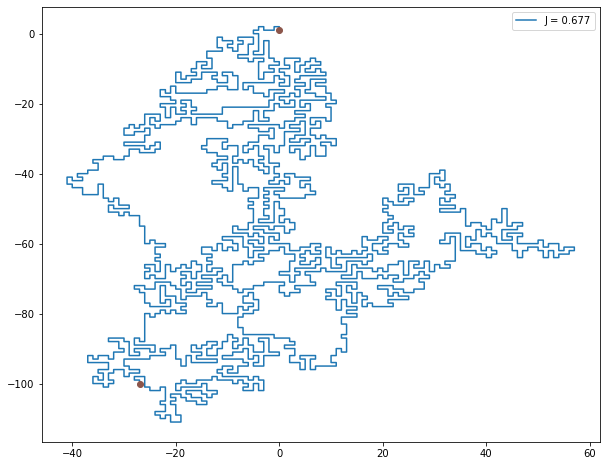

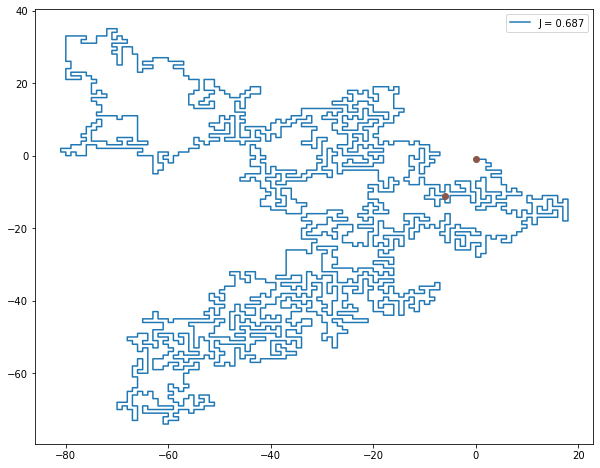

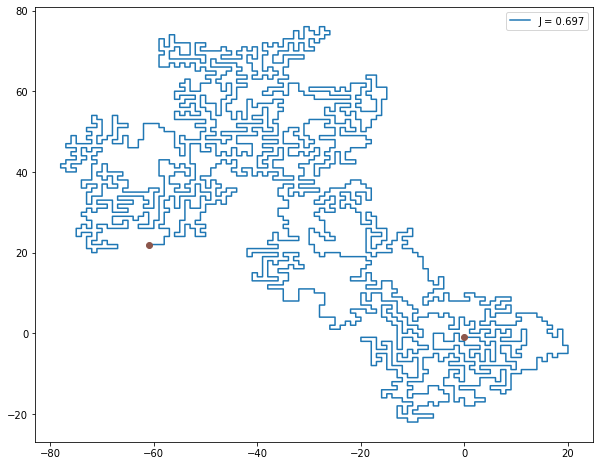

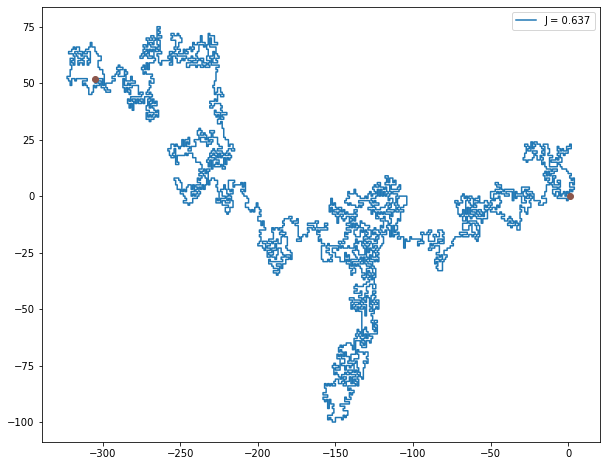

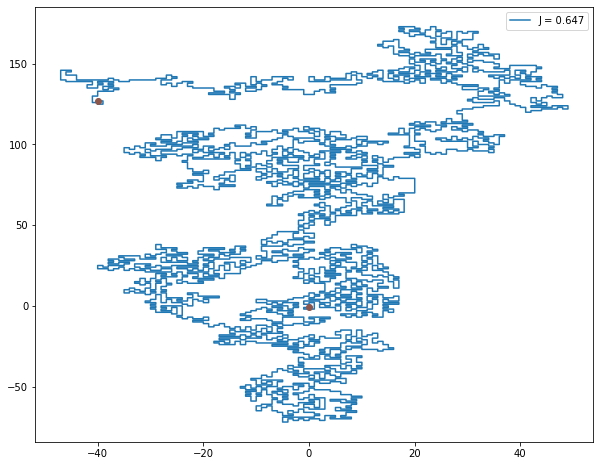

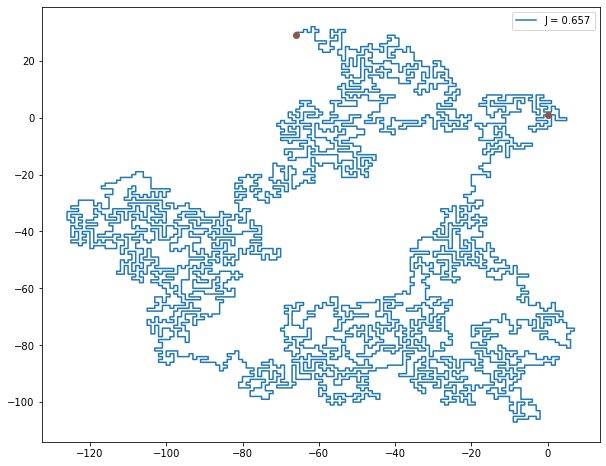

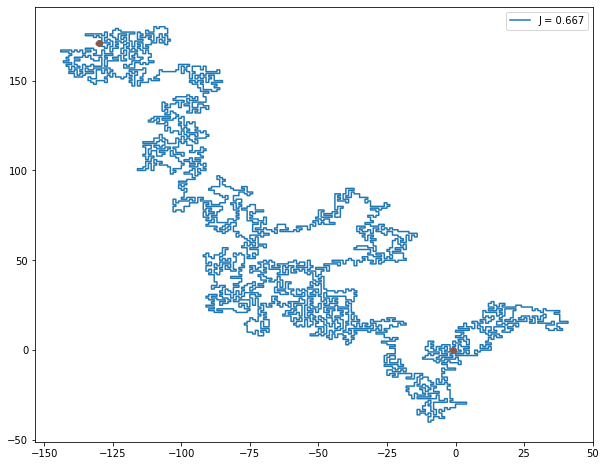

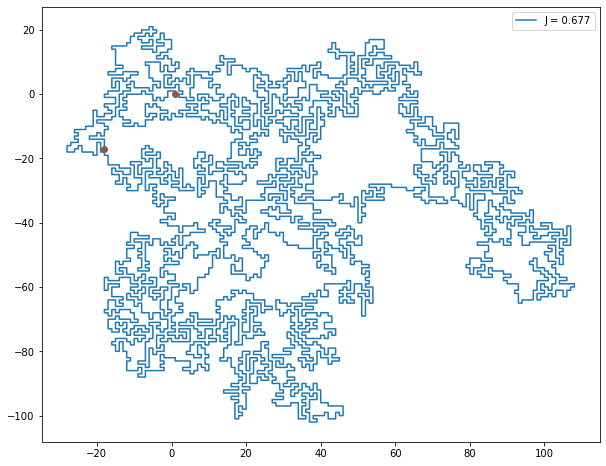

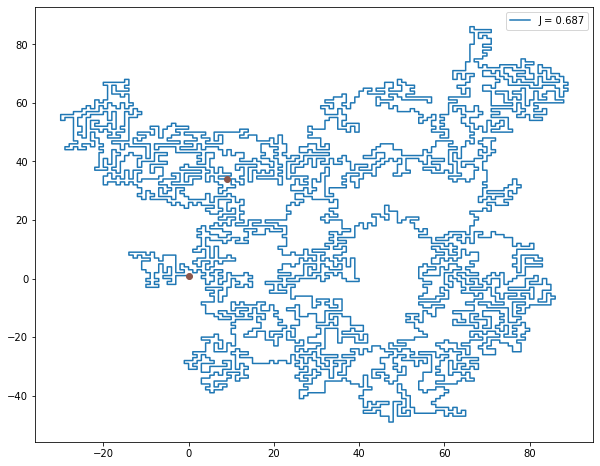

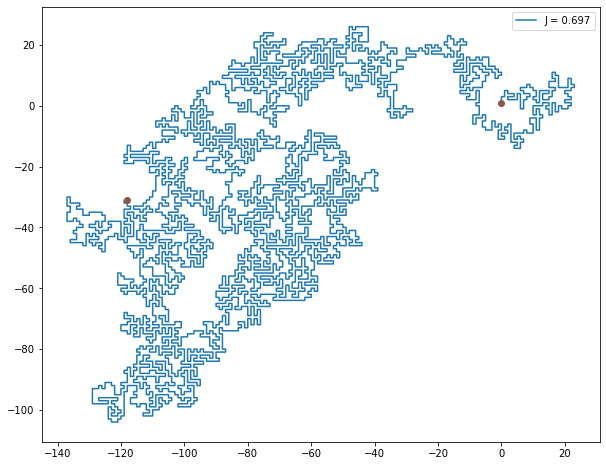

In [96]:
for file in files2:
    chain2 = np.loadtxt(file)
    filename = str(file)
    b = filename[len(filename) - 1 - 11:len(filename)-7]
    N = filename[len(filename) - 1 - 18:len(filename)-15]
    x = chain2[:,0]
    y = chain2[:,1]
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(x,y, label='J = ' + b)
    ax.plot([x[0]], [y[0]], 'o', color='tab:brown')
    ax.plot([x[-1]], [y[-1]], 'o', color='tab:brown')
    plt.legend()
    plt.savefig(IMG / ("Chain_N_" + N + "_J_" + b + ".png"))

In [94]:
b = filename[len(filename) - 1 - 18:len(filename)-15]
b

'1000'

In [90]:
filename

'C:\\Users\\user\\Documents\\Проект\\Simulation Results\\Цепочки_вечер\\Example_of_Conformation_N_1000_J_0.687000.txt'

In [2]:
saw_1 = [(0, 0), (1, 0), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (2, 2), (2, 1), (2, 0), (2,-1), (2,-2), (3,-2), (3,-1)]

# move


In [3]:
def plot_spins(ax, saw):
    ks = []
    for mon in saw:
        m = np.array(mon)
        k = 0
        for step in [[1,0], [-1,0], [0,1], [0,-1]]:
            if saw.count(tuple(m + step)) == 1:
                k += 1
        ks.append(k)
    print(ks)
    for i, form in zip([2,3,4], ['ok', '^b', 'sr']):
        up = [c for c, spin in zip(saw, ks) if spin == i]
        xx_up, yy_up = zip(*up)
        ax.plot(xx_up, yy_up, form, ms=8, label='a = '+ str(i))
    return ax

[2, 3, 4, 3, 3, 2, 2, 4, 2, 3, 3, 2, 3, 4, 2, 3, 2, 3, 4, 4, 3, 2, 3, 3, 4, 3, 2]


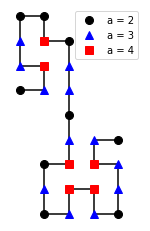

In [36]:
fig, ax = plt.subplots() #figsize=(9, 3))

#### first SAW

# links
saw = saw_1
xx, yy = zip(*saw)
ax.plot(xx, yy, '-', color='k')
plot_spins(ax, saw)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_aspect('equal')
ax.set_xlim(-0.5,5)

ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.legend(loc=0)
plt.savefig('count2.png', bbox_inches='tight')

In [35]:
saw_1 = [(0, 0), (1, 0), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3),
         (1, 2), (2, 2), (2, 1), (2, 0), (2,-1), (2,-2), (1,-2),
         (1,-3), (1,-4), (2, -4), (2,-3), (3,-3), (3,-4), (4,-4),
         (4,-3),(4,-2),(3,-2),(3,-1),(4,-1)]

saw_1.insert(10, (2,0))
saw_1
for i in range(11, len(saw_1)):
    saw_1[i] = (saw_1[i][0], saw_1[i][1] - 1)
saw_1

[(0, 0),
 (1, 0),
 (1, 1),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 3),
 (1, 2),
 (2, 2),
 (2, 1),
 (2, 0),
 (2, -1),
 (2, -2),
 (2, -3),
 (1, -3),
 (1, -4),
 (1, -5),
 (2, -5),
 (2, -4),
 (3, -4),
 (3, -5),
 (4, -5),
 (4, -4),
 (4, -3),
 (3, -3),
 (3, -2),
 (4, -2)]

In [119]:
s = np.array(saw_1[5])
tuple(s + [0,1])

(0, 4)

TypeError: 'tuple' object does not support item assignment